# Case study on Credit Risk

# Context: 
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer 
eligibility for loan.

# Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

* Variable	      Description
* Loan_ID	          Unique Loan ID
* Gender	          Male/ Female
* Married	          Applicant married (Y/N)
* Dependents	      Number of dependents
* Education	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed	  Self employed (Y/N)
* ApplicantIncome	  Applicant income
* CoapplicantIncome Coapplicant income
* LoanAmount	      Loan amount in thousands
* Loan_Amount_Term  Term of loan in months
* Credit_History	  credit history meets guidelines
* Property_Area	  Urban/ Semi Urban/ Rural
* Loan_Status	      Loan approved (Y/N)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os, sys

In [2]:
data=pd.read_csv('2. CreditRisk.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
# Droping the Loan IDs

data=data.drop('Loan_ID', axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
data['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

C:\Users\vkgb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


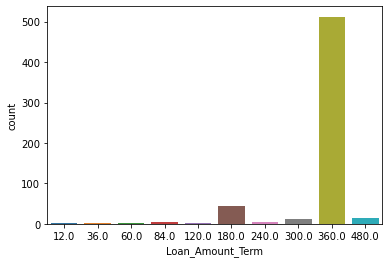

In [7]:
sns.countplot(data['Loan_Amount_Term']);

The Loan_Amount_Term column is highly skewed, Therefore we will delete this column.

In [8]:
data.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [9]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Every columns missing value is replaced with 0
data=data.dropna(axis=0)
data=data.replace({'NaN':data.median()})
data

C:\Users\vkgb\AppData\Local\Temp/ipykernel_13104/914912747.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.replace({'NaN':data.median()})


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


In [19]:
data.shape

(511, 11)

In [20]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
# Lets analyse the distribution of the various attributes

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,511.0,5308.146771,5561.209487,150.0,2885.5,3858.0,5820.0,81000.0
CoapplicantIncome,511.0,1561.997886,2559.383166,0.0,0.0,1086.0,2253.5,33837.0
LoanAmount,511.0,138.776908,82.889278,0.0,97.5,125.0,165.5,600.0
Credit_History,511.0,0.843444,0.363738,0.0,1.0,1.0,1.0,1.0
Loan_Status,511.0,0.679061,0.467295,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

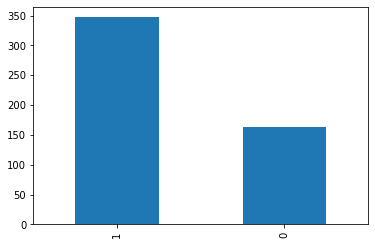

In [26]:
data['Loan_Status'].value_counts().plot(kind='bar')

In [28]:
data['Loan_Status'].value_counts(normalize=True)

1    0.679061
0    0.320939
Name: Loan_Status, dtype: float64

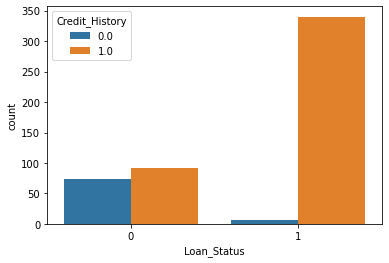

In [29]:
ax= sns.countplot(x="Loan_Status", hue="Credit_History", data= data)

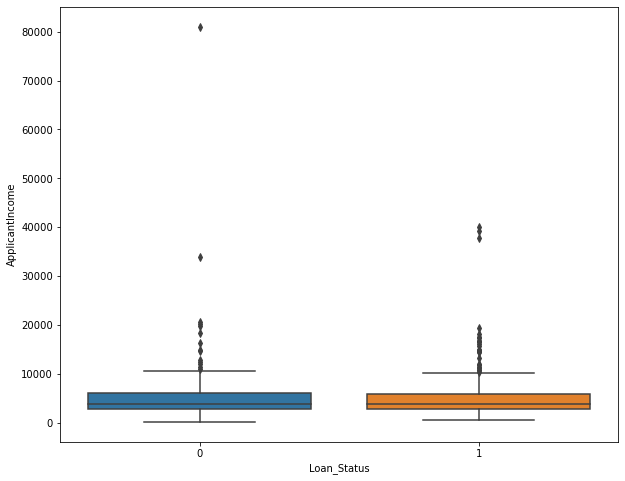

In [32]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(y="ApplicantIncome", x="Loan_Status", data=data )

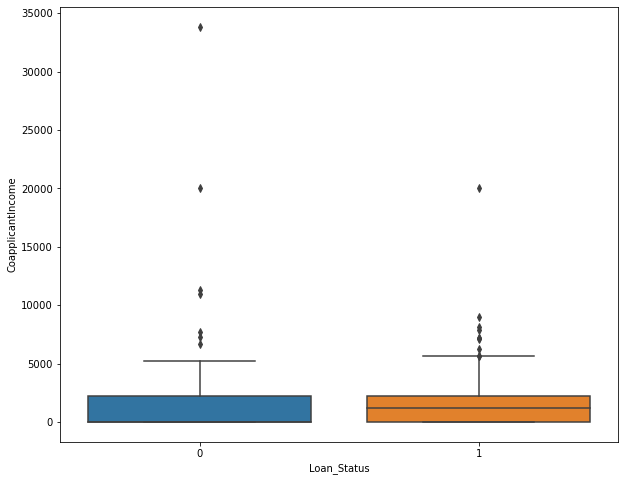

In [33]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(y="CoapplicantIncome", x= "Loan_Status", data=data)

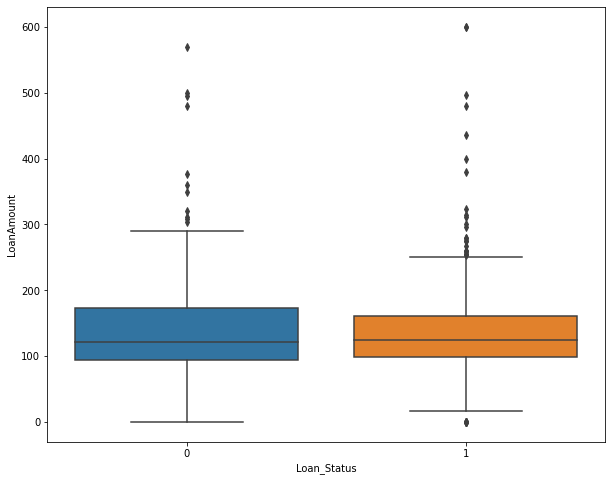

In [35]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(y="LoanAmount", x="Loan_Status", data= data)

In [36]:
# Let us look the target variable which is "Loan_Status", to understand how the values are distributes at various places

data.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5648.908537,1708.25000,142.445122,0.554878
1,5147.095101,1492.87585,137.043228,0.979827


In [37]:
#Convert X & Y variable to a categorical variable as relevant

data['Loan_Status']=data['Loan_Status'].astype('category')
data['Credit_History']=data['Credit_History'].astype('category')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             511 non-null    object  
 1   Married            511 non-null    object  
 2   Dependents         511 non-null    object  
 3   Education          511 non-null    object  
 4   Self_Employed      511 non-null    object  
 5   ApplicantIncome    511 non-null    int64   
 6   CoapplicantIncome  511 non-null    float64 
 7   LoanAmount         511 non-null    int64   
 8   Credit_History     511 non-null    category
 9   Property_Area      511 non-null    object  
 10  Loan_Status        511 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 57.3+ KB


# Model Building

In [40]:
# Define x & y variable

X= data.drop('Loan_Status', axis=1)
Y=data[['Loan_Status']]

In [41]:
# Convert the categorical variables into dummy variables

X=pd.get_dummies(X, drop_first=True)

In [42]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141,1,0,0,0,0,0,0,1,0,1


In [43]:
# Split data into training & Testing data sets

x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.30, random_state=42)

In [44]:
# Bulding a logistic regression model

logreg=LogisticRegression(max_iter=1000)

In [45]:
logreg.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

# Prediction

In [47]:
# Predict for test set
pred_test=logreg.predict(x_test)

In [48]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [49]:
#Test Accuracy

from sklearn.metrics import accuracy_score

test_accuracy=accuracy_score(y_test, pred_test)

print('Test Accuracy:', np.round(test_accuracy, 2))

Test Accuracy: 0.82


In [51]:
# Train Accuracy

#predict for train

pred_train=logreg.predict(x_train)

train_accuracy=accuracy_score(y_train, pred_train)
print('Accuracy of the model for training data set is:', np.round(train_accuracy, 2))

Accuracy of the model for training data set is: 0.82


## Confusion Matrix

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
mat_train=confusion_matrix(y_train, pred_train)
print("Confusion matrix for training data is: \n", mat_train)

Confusion matrix for training data is: 
 [[ 51  61]
 [  5 240]]


In [55]:
# Confusion matrix for testing data

mat_test=confusion_matrix(y_test, pred_test)
print("Confusion matrix for Testing data is: \n", mat_test)

Confusion matrix for Testing data is: 
 [[27 25]
 [ 3 99]]


#### Sensitivity = TruePositive / (TruePositive + FalseNegative)
#### Specificity = TrueNegative / (FalsePositive + TrueNegative)


#### Sensitivity = True Positive Rate
#### Specificity = 1 – False Positive Rate

In [59]:
Sensitivity=27/(27+25)
print('Sensitivity of the model is', Sensitivity)

Sensitivity of the model is 0.5192307692307693


In [62]:
Specificity= 99/(99+1)
print('Specificity of the model is', Specificity)

Specificity of the model is 0.99
